Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "meedovique"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [326]:
from math import sqrt
G = 6.67384 * 10**-11

def error(M1, dM1, M2, dM2, r, dr):
    
    F = G * M1 * M2 / r**2
    
    errM1_2 = (dM1 / M1)**2 
    errM2_2 = (dM2 / M2)**2 
    errR_2 = (2 * dr / r)**2 

    sigma = F * sqrt(errM1_2 + errM2_2 + errR_2)    
    
    return F, sigma

In [327]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 0.005625407272639265)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

In [328]:
G = 6.67384 * 10**-11
histPoints = 100


def normPdf(mu, sigma, bins):
    constPart = 1 / (sigma * np.sqrt(2 * np.pi))
    expPart = -(bins - mu)**2 / (2 * sigma**2)
    return constPart * np.exp(expPart)

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6, fRange=None):
    m1Norm = np.random.normal(M1, dM1, n)
    m2Norm = np.random.normal(M2, dM2, n)
    rNorm = np.random.normal(r, dr, n)
    
    F = G * m1Norm * m2Norm / rNorm**2
    
    if fRange is not None:
        F = F[np.where((F>fRange[0]) & (F<fRange[1]))]
    
    plt.hist(F, histPoints, density=True)

# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

In [329]:
def drawErrorNorm(M1, dM1, M2, dM2, r, dr, points=100, howFar=3.5):
    mu, sigma = error(M1, dM1, M2, dM2, r, dr)
    x = np.linspace(mu - howFar*sigma, mu + howFar*sigma, 100)

    plt.plot(x, normPdf(mu, sigma, x), linewidth=2, color='r')

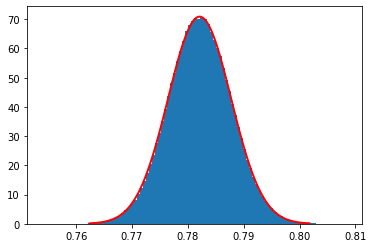

In [330]:
m1 = 40*10**4
dm1 = 0.05 * 10**4
m2 = 30 * 10**4
dm2 = 0.1 * 10**4
r = 3.2
dr = 0.01

drawErrorNorm(m1, dm1, m2, dm2, r, dr)
MonteCarloNormal(m1, dm1, m2, dm2, r, dr)

plt.show()

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

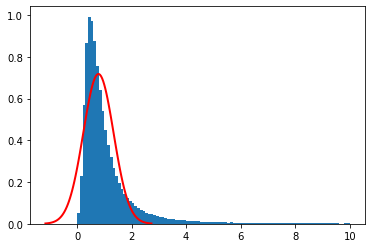

In [331]:
m1 = 40*10**4
dm1 = 2 * 10**4
m2 = 30 * 10**4
dm2 = 10 * 10**4
r = 3.2
dr = 1

drawErrorNorm(m1, dm1, m2, dm2, r, dr)
MonteCarloNormal(m1, dm1, m2, dm2, r, dr, fRange=(0,10))

plt.show()

# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

Судя по графикам стандартный метод не очень точно прогнозирует распределение величин при больших отклонениях. Например:
* Стандартный метод дает прогноз на отрицательные элементы(чего не может быть)
* Точно так же стандартный метод не прогнозирует значения больше 2, хотя с такой точностью их может быть получено весомое количество
* Даже самое вероятное значение стандартный метод считает не очень точно - симуляция показывает, что она будет смещена ближке к нулю

Так что метод Монте-Карло точнее и объективенее показывает какие значения будут принимать величины, т.к является максимально приближенной симуляцией значений